### What is K-means++ Algorithm?
- Clustering is used to group similar data points.
- K-Means is used commonly used clustering method, but it often gives poor results because the intial cluster senters are choosen randomly.
- This may lead to empty clusters, overlapping clusters or centroids falling too close to each other.
- K-Means++ is an improved version of K-Means algorithm. Instead of picking all centroids randomly, it chooses the first center randomly and then selects the remaining centers in a spaced-manner.
- This ensures -
  1. Better cluster separation.
  2. Faster convergence.
  3. More consistent results compared to K-Means.

### How K-mean++ Algorithm Works:
- The algorithm follows these steps -
  1. First center - Choose the first cluster center uniformly at random from the data points.
  2. Subsequent centers - For each remaining center -
     - Calculate the distance from each data point to its nearest existing center.
     - Choose the next center with probability proportional to the sqaure of this distance.
     - Points farther from existing centers have a higher chance of being selected.
  3. Standard K-means - Once all - centers are initialized, proceed with the standard K-means algorithm.
- The squared distance weighted is important it ensures that points far from existing centers are much more likely to be chosen, naturally spreading the centers across the data space.
### Mathematical Foundation:
- Let's formalize the selecting probability.
- When choosing the (i+1)-th center, the probability of selecting point x is -
- Formula will be P(x) = D(x)² / ∑D(x')²
  - D(x) - is the shortest distance from point x to any already-chosen center and the sum runs over all data points.his probability distribution is called D²-weighted and it's the fundamental principle that makes K-means++ work so well.

### Implementation in Python:
#### 1.Dataset Creation:

In [9]:
import numpy as np
import matplotlib.pyplot as plt

mean_01 = np.array([0.0, 0.0])
cov_01 = np.array([[1, 0.3], [0.3, 1]])
dist_01 = np.random.multivariate_normal(mean_01, cov_01, 100)

mean_02 = np.array([6.0, 7.0])
cov_02 = np.array([[1.5, 0.3], [0.3, 1]])
dist_02 = np.random.multivariate_normal(mean_02, cov_02, 100)

mean_03 = np.array([7.0, -5.0])
dist_03 = np.random.multivariate_normal(mean_03, cov_01, 100)

mean_04 = np.array([2.0, -7.0])
cov_04 = np.array([[1.2, 0.5], [0.5, 1.3]])
dist_04 = np.random.multivariate_normal(mean_04, cov_01, 100)

data = np.vstack((dist_01, dist_02, dist_03, dist_04))
np.random.shuffle(data)

#### 2. Plotting Helper function:
- This function is used to visualize the data points and the selected centroids at each step. All data points are shown in gray.
  1. Prevoiusly selected centroids are marked in black.
  2. The current centroid being added is marked in red.
  3. This help visualize the centroid initializtion process step by step. 

In [15]:
def plot(data, centroids):
    plt.scatter(data[:, 0], data[:, 1], marker='.', color='gray', label='Data Points')
    if centroids.shape[0] > 1:
        plt.scatter(centroids[:-1, 0], centroids[:-1, 1], color='black', label='Selected Centroids')
    plt.scatter(centroids[-1, 0], centroids[-1, 1], color='red', label='Next Centroid')
    plt.title(f'Select {centroids.shape[0]}th Centroid')
    plt.legend()
    plt.xlim(-5, 12)
    plt.ylim(-10, 15)
    plt.show()

#### 3. Euclidean Distance Function:


In [16]:
def distance(p1, p2):
    return np.sqrt(np.sum((p1 - p2)**2))

#### 4. K-Means++ Initialization:
- This function selects initial centroids using the K-Means++ strategy.
- The first centroid is chosen randomly from the dataset. For the next centroids:
  1. It calculates the distance of every point to its nearest existing centroid.
  2. Chooses the point farthest from the nearest centroid as the next centroid and ensures centroids are spaced far apart initially, giving better cluster seperation.

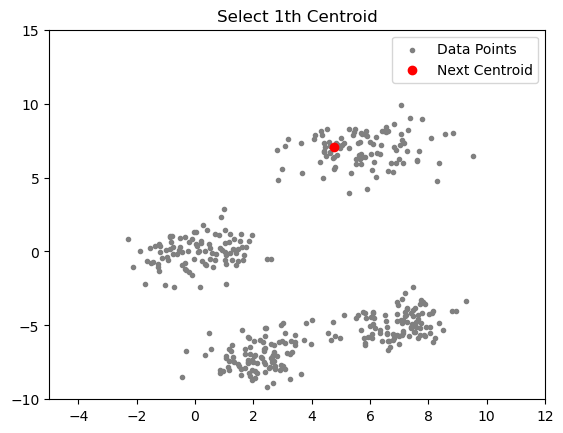

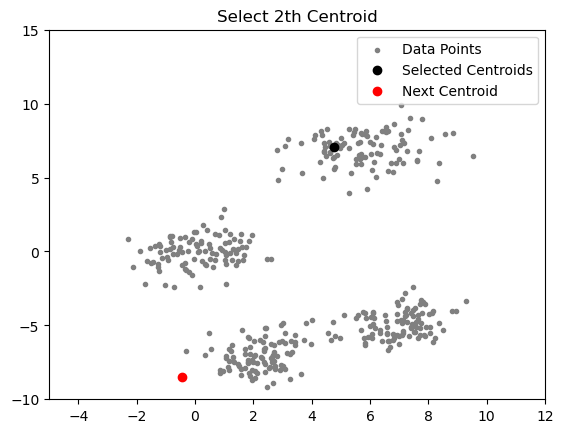

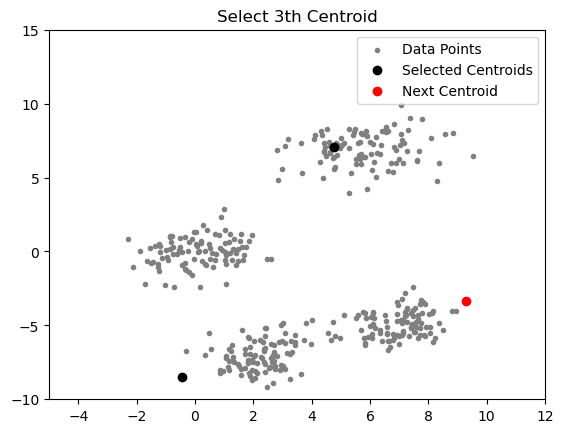

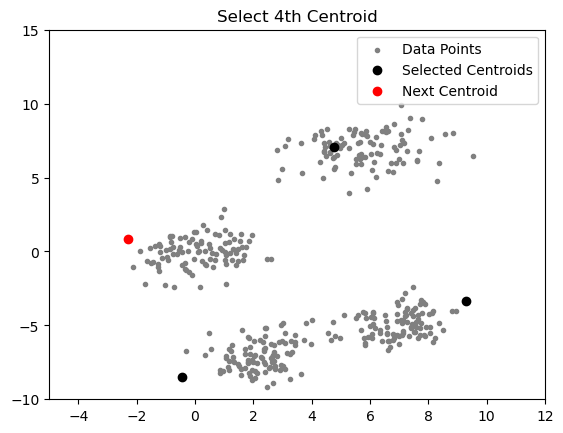

In [17]:
import sys
def initialize(data, k):
    centroids = []
    centroids.append(data[np.random.randint(data.shape[0])])
    plot(data, np.array(centroids))

    for _ in range(k-1):
        distances = []
        for point in data:
            min_dist = min([distance(point, c) for c in centroids])
            distances.append(min_dist)

        next_centroid = data[np.argmax(distances)]
        centroids.append(next_centroid)
        plot(data, np.array(centroids))

    return np.array(centroids)

# Run initialization
centroids = initialize(data, k=4)